In [1]:
import rockmag as rmag
import pandas as pd
import numpy as np
from numpy.linalg import svd, lstsq
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = './example_data/ECMB'

file = dir_path + '/measurements.txt'
measurements = pd.read_csv(file, sep='\t', skiprows=1)


In [3]:
rmag.make_hyst_plots(measurements)

Dropdown(description='Specimen:', options=('NED1-5c', 'NED18-2c', 'NED2-8c', 'NED4-1c', 'NED6-6c'), value='NED…

RadioButtons(description='Plot with:', options=(('matplotlib', False), ('plotly', True)), value=False)

Output()

In [4]:
specimen_name = 'NED1-5c'
hyst_data = rmag.extract_hysteresis_data(measurements, specimen_name)

In [5]:
#loop_fields = []
#loop_moments = []
#print(hyst_data['meas_field_dc'])
loop_moments = hyst_data['magn_mass']
loop_fields = hyst_data['meas_field_dc']
"""
for x in hyst_data['meas_field_dc']:
    s1=x
    loop_fields.append(float(s1))
for x in hyst_data['magn_mass']:
    s1=x
    loop_moments.append(float(s1))  
    """
n_loop = len(loop_fields)


polydegree = 1
nsmooth = 3
B_offset = 0
M_offset = 0
acheckvar= 0
print(n_loop)
#plt.plot(loop_fields, loop_moments)

802


In [6]:
loop_fields

0      1.0010
1      0.9995
2      0.9966
3      0.9926
4      0.9880
        ...  
797    0.9730
798    0.9780
799    0.9830
800    0.9881
801    1.0000
Name: meas_field_dc, Length: 802, dtype: float64

In [7]:
loop_moments

0      0.1988
1      0.1986
2      0.1981
3      0.1974
4      0.1967
        ...  
797    0.1941
798    0.1949
799    0.1958
800    0.1966
801    0.1985
Name: magn_mass, Length: 802, dtype: float64

In [8]:
grid_fields, grid_moments =rmag.loop_grid(n_loop, polydegree, nsmooth, loop_fields, loop_moments, B_offset, M_offset)

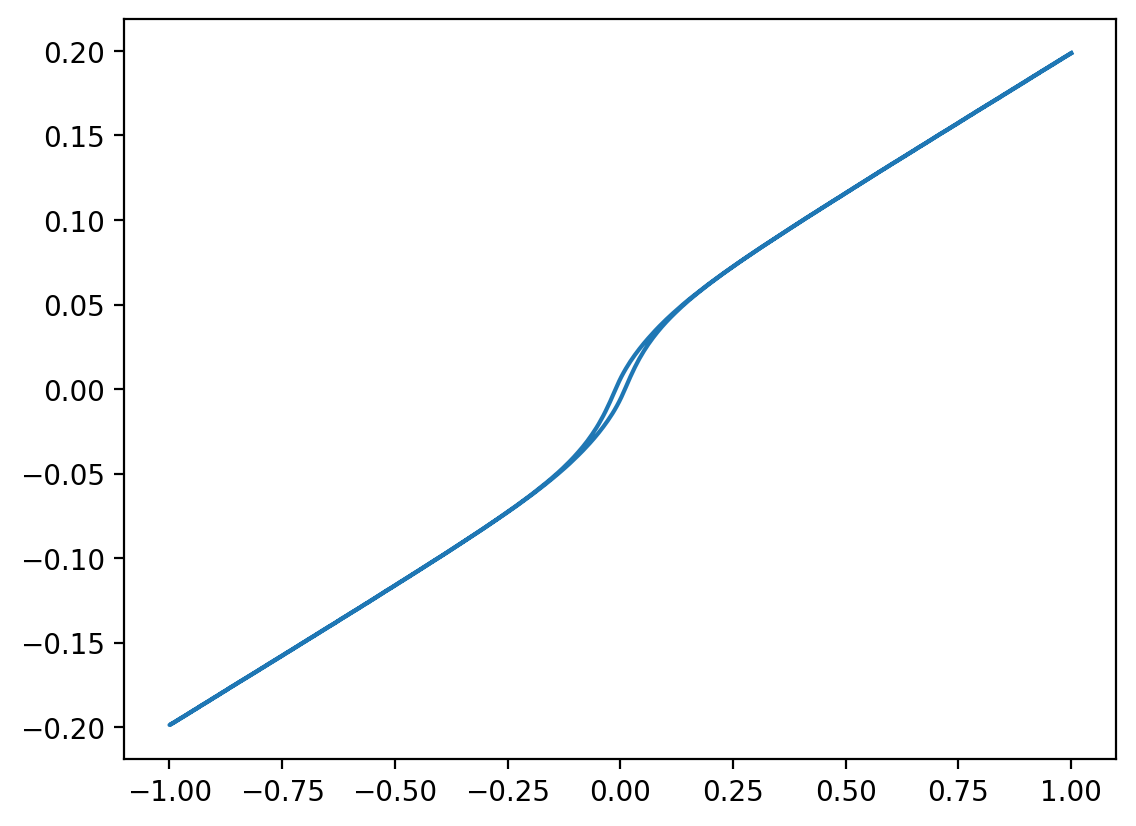

In [9]:
plt.plot(loop_fields, loop_moments)


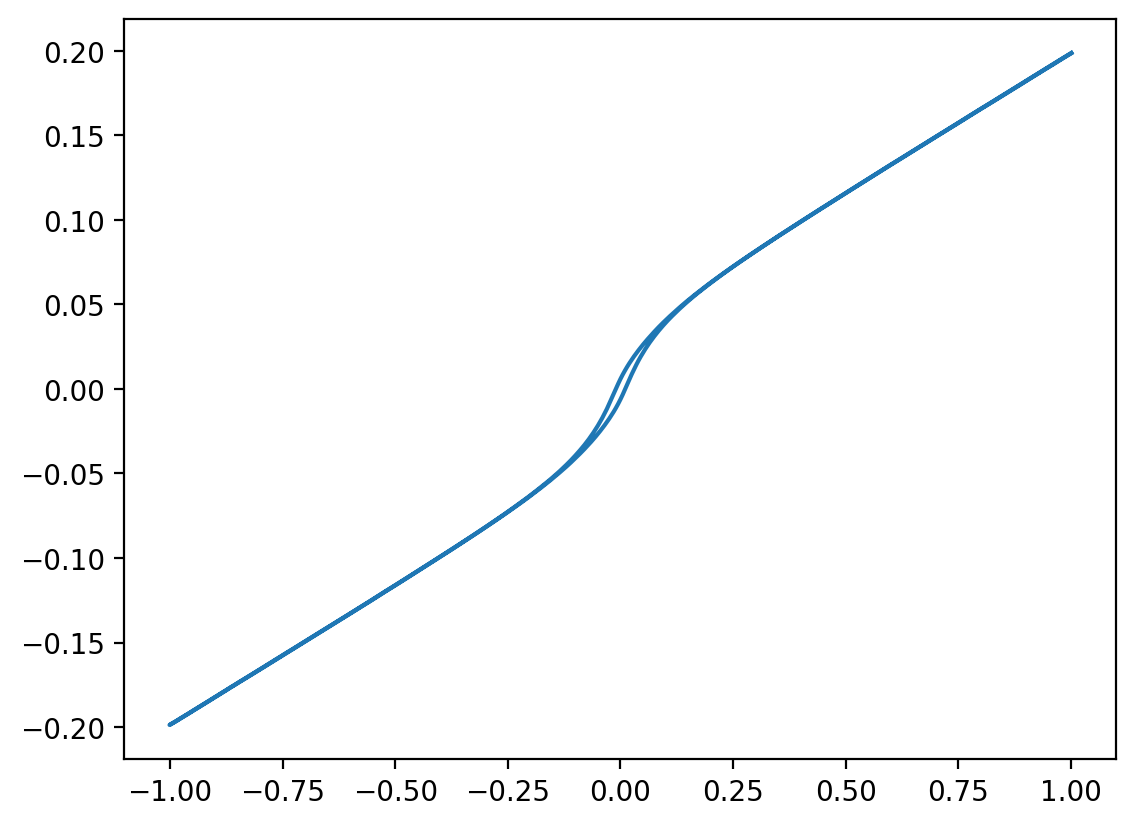

In [10]:
plt.plot(grid_fields, grid_moments)

In [11]:
moment_sub = rmag.branch_sub(n_loop, grid_moments)

In [21]:
len(moment_sub)

401

In [22]:
len(grid_fields)

802

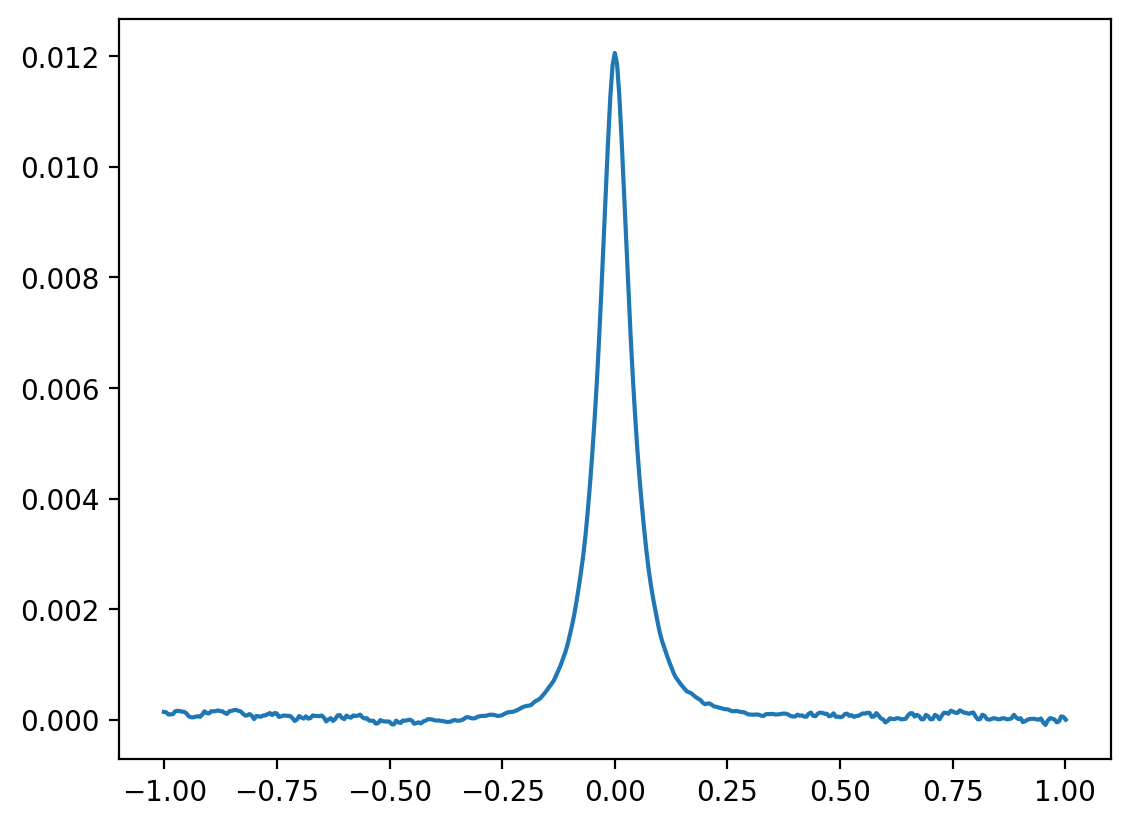

In [23]:
plt.plot(grid_fields[401:], moment_sub)